# 场景

想象一下，你拿到一个数据集有1000个特征，要用此数据集做分析。这1000个特征之间的相互关系不明，你感到有必要减少数据维度。

### 核心思路
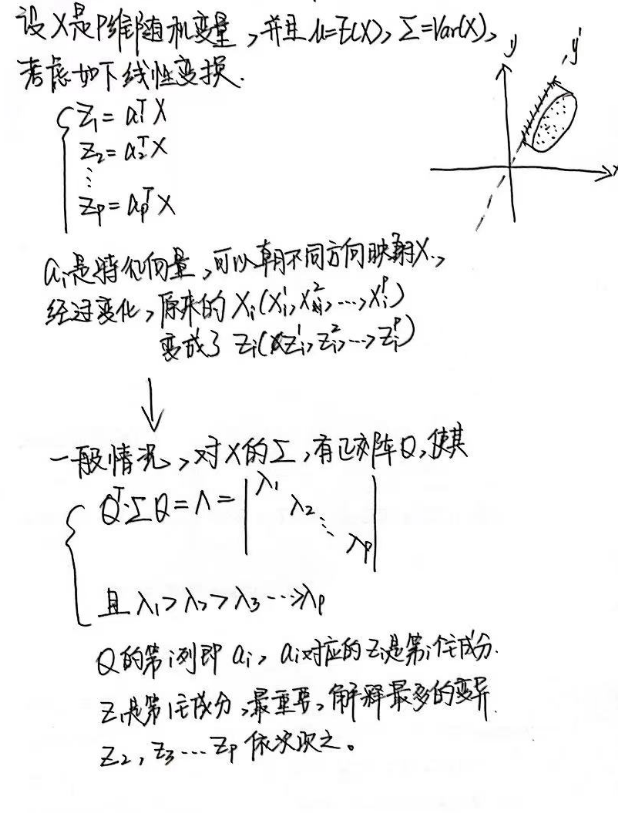

In [1]:
#在R中使用princomp()可以完成主成分分析

#举例：有30名学生，测量得到他们的身高（X1），体重（X2），胸围（X3）和坐高（X4）。
#（1）我想降维到2
#（2）想可视化
student<-data.frame(
        X1=c(148, 139, 160, 149, 159, 142, 153, 150, 151, 139,
        140, 161, 158, 140, 137, 152, 149, 145, 160, 156,
        151, 147, 157, 147, 157, 151, 144, 141, 139, 148),
        X2=c(41, 34, 49, 36, 45, 31, 43, 43, 42, 31,
        29, 47, 49, 33, 31, 35, 47, 35, 47, 44,
        42, 38, 39, 30, 48, 36, 36, 30, 32, 38),
        X3=c(72, 71, 77, 67, 80, 66, 76, 77, 77, 68,
        64, 78, 78, 67, 66, 73, 82, 70, 74, 78,
        73, 73, 68, 65, 80, 74, 68, 67, 68, 70),
        X4=c(78, 76, 86, 79, 86, 76, 83, 79, 80, 74,
        74, 84, 83, 77, 73, 79, 79, 77, 87, 85,
        82, 78, 80, 75, 88, 80, 76, 76, 73, 78)
)
student

X1,X2,X3,X4
<dbl>,<dbl>,<dbl>,<dbl>
148,41,72,78
139,34,71,76
160,49,77,86
149,36,67,79
159,45,80,86
142,31,66,76
153,43,76,83
150,43,77,79
151,42,77,80


In [4]:
#当样本各变量量纲差异不大，直接使用协方差矩阵计算。如果量纲差异很大，使用相关矩阵计算
stu_PCA1 <-  princomp(student, cor = T)
stu_PCA1
stu_PCA2 <-  princomp(covmat=cov(student),cor = T)
stu_PCA2

Call:
princomp(x = student, cor = T)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.8817805 0.5598064 0.2817959 0.2571184 

 4  variables and  30 observations.

Call:
princomp(cor = T, covmat = cov(student))

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1.8817805 0.5598064 0.2817959 0.2571184 

 4  variables and  NA observations.

In [5]:
summary(stu_PCA1,loadings = T)

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4
Standard deviation     1.8817805 0.55980636 0.28179594 0.25711844
Proportion of Variance 0.8852745 0.07834579 0.01985224 0.01652747
Cumulative Proportion  0.8852745 0.96362029 0.98347253 1.00000000

Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4
X1  0.497  0.543  0.450  0.506
X2  0.515 -0.210  0.462 -0.691
X3  0.481 -0.725 -0.175  0.461
X4  0.507  0.368 -0.744 -0.232

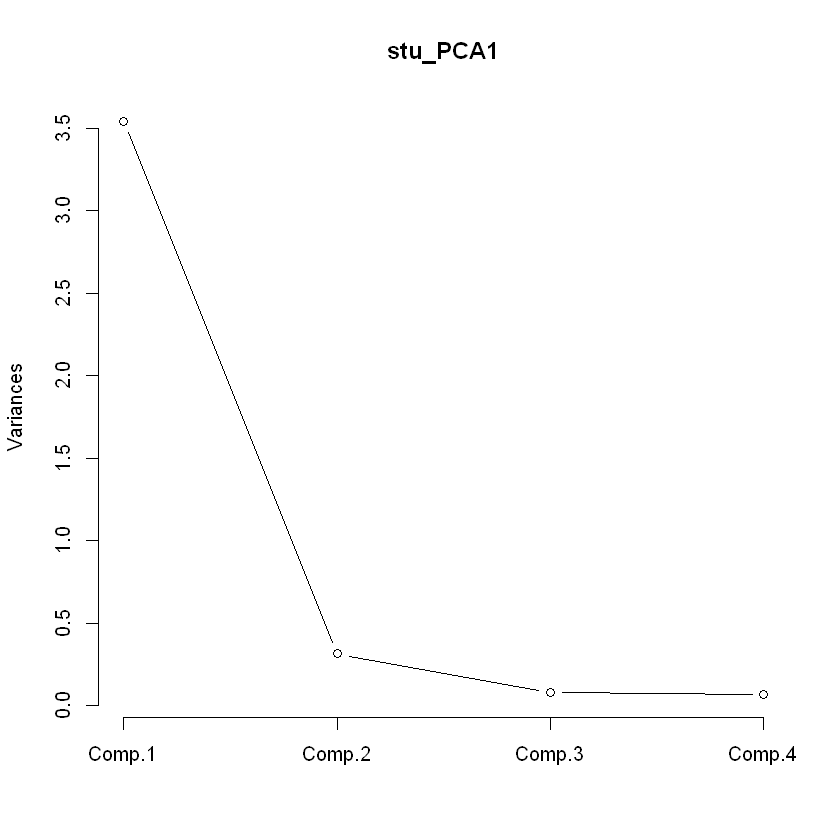

In [7]:
screeplot(stu_PCA1, type = "lines")

In [10]:
#转化原来数据，降维
predict(stu_PCA1)

data_new <-predict(stu_PCA1)[,1:2]
data_new

Comp.1,Comp.2,Comp.3,Comp.4
-0.06990950,-0.23813701,0.35509248,-0.266120139
-1.59526340,-0.71847399,-0.32813232,-0.118056646
2.84793151,0.38956679,0.09731731,-0.279482487
-0.75996988,0.80604335,0.04945722,-0.162949298
2.73966777,0.01718087,-0.36012615,0.358653044
-2.10583168,0.32284393,-0.18600422,-0.036456084
1.42105591,-0.06053165,-0.21093321,-0.044223092
0.82583977,-0.78102576,0.27557798,0.057288572
0.93464402,-0.58469242,0.08814136,0.181037746
-2.36463820,-0.36532199,-0.08840476,0.045520127


Comp.1,Comp.2
-0.06990950,-0.23813701
-1.59526340,-0.71847399
2.84793151,0.38956679
-0.75996988,0.80604335
2.73966777,0.01718087
-2.10583168,0.32284393
1.42105591,-0.06053165
0.82583977,-0.78102576
0.93464402,-0.58469242
-2.36463820,-0.36532199


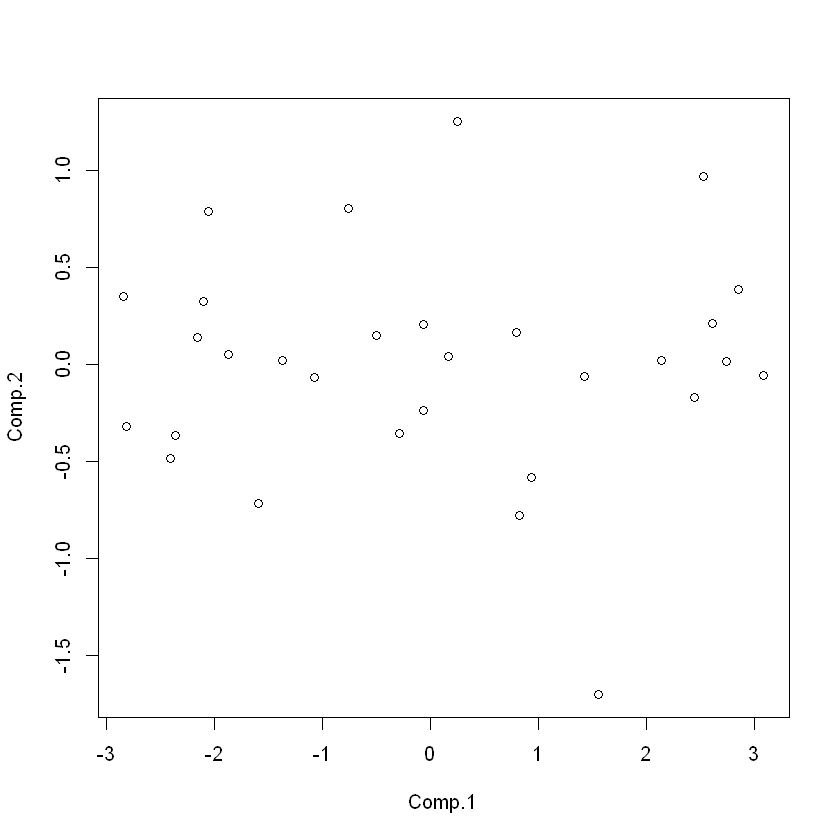

In [11]:
# 可视化
plot(data_new)

## 上节课我们讲道红酒品质聚类的例子，我们继续做可视化部分

In [13]:
winequality <- read.csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ";")
head(winequality)
winequality <- scale(winequality,T,T)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [14]:
res1 <- kmeans(winequality, centers=2)
res1

K-means clustering with 2 clusters of sizes 2906, 1992

Cluster means:
  fixed.acidity volatile.acidity citric.acid residual.sugar  chlorides
1    -0.1256230      -0.04857718  -0.1525250     -0.5596972 -0.2761917
2     0.1832633       0.07086611   0.2225088      0.8165061  0.4029183
  free.sulfur.dioxide total.sulfur.dioxide    density         pH   sulphates
1          -0.3850919           -0.5176631 -0.6389999  0.1447722 -0.03598684
2           0.5617856            0.7551852  0.9321957 -0.2111987  0.05249887
     alcohol    quality
1  0.5457550  0.2470389
2 -0.7961667 -0.3603890

Clustering vector:
   [1] 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 2 1 2 1 1 2 1 1 1 2 1 1
  [38] 1 2 2 2 2 2 1 1 1 2 2 2 2 1 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1 2 2 2 2 1
  [75] 1 2 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2
 [112] 2 2 2 2 1 1 1 2 2 1 2 2 1 2 1 1 2 1 1 1 2 2 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1
 [149] 1 1 1 2 1 1 1 2 2 1 1 1 1 2 1 2 2 2 2 1 2 2 1 1 1 1 2 1 1 2 1 

In [15]:
#PCA降维
d_PCA <-  princomp(winequality[,1:12], cor = F)
cops <- predict(d_PCA)[,1:2]
data_n <- data.frame(cops,class=as.factor(res1$cluster))
head(data_n)

,Comp.1,Comp.2,class
,<dbl>,<dbl>,<fct>
1,3.5429563,0.3550511,2
2,-0.6127372,-0.2893815,1
3,0.1423793,1.1679020,1
4,1.3793842,-0.1995669,2
5,1.3793842,-0.1995669,2
6,0.1423793,1.1679020,1


In [16]:
library(ggplot2)


Warning message:
"程辑包'ggplot2'是用R版本4.2.2 来建造的"


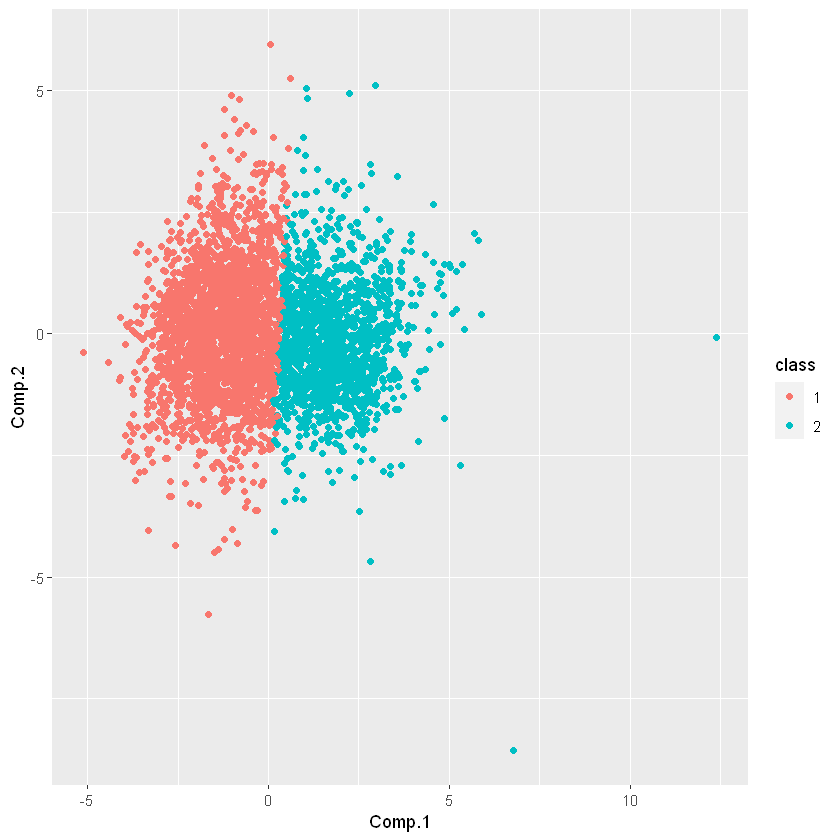

In [17]:
ggplot(data_n, aes(x=Comp.1, y=Comp.2, col=class)) +
  geom_point()